# **ANALYSIS ON HOTEL BOOKING DATASET: WHAT DRIVES A HOTEL BOOKING CANCELLATION?**

Table of Contents For this Notebook

1. Exploratory Data Analysis \
    i. Structure of the Data \
   ii. Analyzing the Variables \
   iii. Initial Analysis of Missing Values \
   iv. Data Visualization \
       a) Distribution of Categorical Values
       b) Distribution of Numerical Values \
       c) Correlation between Variables \
       d) Applying Trimming to Combat Outlier Effects 
   
3. Research Questions

4. Hypothesis Tests (Without Missing Values ) \
    i. Hypothesis 1 \
       a) Chi Square Test \
       b) Testing for Assumptions of Chi Square Test \
       c) Visualizing Cancellation Proportions among the Hotel Types \
       d) Results of the Hypothesis Test \
   ii. Hypothesis 2 \
       a) Fitting the Logistic Regression \
       b) Logistic Regression Diagnostics \
           I. Evaluating Model Performance \
           II. Multicollinearity Check \
       c) Results of the Hypothesis Test 

5.  Analysing Effects of Simulated Missing Data \
    i. Simulating and Analysing Effects of MCAR Missing Values \
    ii. Simulating and Analysing Effects of MNAR Missing Values

## **Introduction**

Hotel booking cancellations pose significant challenges for revenue management and operational planning in the hospitality industry. Understanding the factors driving cancellations allows managers to develop strategies to reduce their occurrence, enhance booking optimization, and improve guest satisfaction. This study examines variations in booking cancellations between Resort Hotels and City Hotels and investigates the relationship between guest characteristics, booking behaviors, and cancellation likelihood. Employing logistic regression, we identify predictors of cancellations. The insights gained can guide stakeholders in enhancing customer retention, designing strategic marketing initiatives, and improving operational efficiency.

## **1. Exploratory Data Analysis**

In [51]:
# Loading the data

travelData <- read.csv("hotel booking.csv")

In [53]:
# Viewing part of the data
head(travelData)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,⋯,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone.number,credit_card
,<chr>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Resort Hotel,0,342,2015,July,27,1,0,0,2,⋯,Transient,0,0,0,Check-Out,7/1/2015,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
2,Resort Hotel,0,737,2015,July,27,1,0,0,2,⋯,Transient,0,0,0,Check-Out,7/1/2015,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
3,Resort Hotel,0,7,2015,July,27,1,0,1,1,⋯,Transient,75,0,0,Check-Out,7/2/2015,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
4,Resort Hotel,0,13,2015,July,27,1,0,1,1,⋯,Transient,75,0,0,Check-Out,7/2/2015,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,⋯,Transient,98,0,1,Check-Out,7/3/2015,Linda Hines,LHines@verizon.com,713-226-5883,************5498
6,Resort Hotel,0,14,2015,July,27,1,0,2,2,⋯,Transient,98,0,1,Check-Out,7/3/2015,Jasmine Fletcher,JFletcher43@xfinity.com,190-271-6743,************9263


### i. Structure of the Data

In [56]:
# rows by columns

dim(travelData)

[1] 119390     36

In [58]:
# distinct column names

colnames(travelData)

[1] "hotel"                          "is_canceled"                   
 [3] "lead_time"                      "arrival_date_year"             
 [5] "arrival_date_month"             "arrival_date_week_number"      
 [7] "arrival_date_day_of_month"      "stays_in_weekend_nights"       
 [9] "stays_in_week_nights"           "adults"                        
[11] "children"                       "babies"                        
[13] "meal"                           "country"                       
[15] "market_segment"                 "distribution_channel"          
[17] "is_repeated_guest"              "previous_cancellations"        
[19] "previous_bookings_not_canceled" "reserved_room_type"            
[21] "assigned_room_type"             "booking_changes"               
[23] "deposit_type"                   "agent"                         
[25] "company"                        "days_in_waiting_list"          
[27] "customer_type"                  "adr"                           
[29] "required_car_parking_spaces"    "total_of_special_requests"     
[31] "reservation_status"             "reservation_status_date"       
[33] "name"                           "email"                         
[35] "phone.number"                   "credit_card"

In [60]:
# Summary statistics

summary(travelData)  

    hotel            is_canceled       lead_time   arrival_date_year
 Length:119390      Min.   :0.0000   Min.   :  0   Min.   :2015     
 Class :character   1st Qu.:0.0000   1st Qu.: 18   1st Qu.:2016     
 Mode  :character   Median :0.0000   Median : 69   Median :2016     
                    Mean   :0.3704   Mean   :104   Mean   :2016     
                    3rd Qu.:1.0000   3rd Qu.:160   3rd Qu.:2017     
                    Max.   :1.0000   Max.   :737   Max.   :2017     
                                                                    
 arrival_date_month arrival_date_week_number arrival_date_day_of_month
 Length:119390      Min.   : 1.00            Min.   : 1.0             
 Class :character   1st Qu.:16.00            1st Qu.: 8.0             
 Mode  :character   Median :28.00            Median :16.0             
                    Mean   :27.17            Mean   :15.8             
                    3rd Qu.:38.00            3rd Qu.:23.0             
                    Ma

### Key Insights

In [63]:
# Number of Customers 

length(unique(travelData$name))

[1] 81503

In [65]:
# Calculate the number of canceled bookings
num_canceled_bookings <- sum(travelData$is_canceled == 1)
num_canceled_bookings

[1] 44224

In [67]:
# Booking Cancellation Rate

avg_cancellation_rate <- mean(travelData$is_canceled) * 100
avg_cancellation_rate

[1] 37.04163

### Data Dictionary of the Columns

Columns meaning

hotel: The type of hotel, either "City Hotel" or "Resort Hotel."

is_canceled: Binary value indicating whether the booking was cancelled (1) or not (0).

lead_time: Number of days between booking and arrival.

arrival_date_year: Year of arrival date.

arrival_date_month: Month of arrival date.

arrival_date_week_number: Week number of arrival date.

arrival_date_day_of_month: Day of the month of arrival date.

stays_in_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stays.

stays_in_week_nights: Number of weekday nights (Monday to Friday) the guest stays.

adults: Number of adults.

children: Number of children.

babies: Number of babies.

meal: Type of meal booked.

country: Country of origin.

market_segment: Market segment designation.

distribution_channel: Booking distribution channel.

is_repeated_guest: Binary value indicating whether the guest is a repeated guest (1) or not (0).

previous_cancellations: Number of previous booking cancellations.

previous_bookings_not_canceled: Number of previous bookings not cancelled.

reserved_room_type: Code of room type reserved.

assigned_room_type: Code of room type assigned at check-in.

booking_changes: Number of changes/amendments made to the booking.

deposit_type: Type of deposit made.

agent: ID of the travel agency.

company: ID of the company.

days_in_waiting_list: Number of days in the waiting list before booking.

customer_type: Type of booking.

adr: Average daily rate.

required_car_parking_spaces: Number of car parking spaces required.

total_of_special_requests: Number of special requests made.

reservation_status: Reservation last status.

reservation_status_date: Date of the last status.

name: Guest's name. 

email: Guest's email address.

phone-number: Guest's phone number. 

credit_card: Guest's credit card details. 

### ii. Analyzing the Variables

In [81]:
# Convert variables that should be qualitative to factors

travelData$arrival_date_year <- as.factor(travelData$arrival_date_year)
travelData$arrival_date_day_of_month <- as.factor(travelData$arrival_date_day_of_month)
travelData$agent <- as.factor(travelData$agent)
travelData$arrival_date_week_number <- as.factor(travelData$arrival_date_week_number)
travelData$company <- as.factor(travelData$company)


# Convert binary variables to factors
travelData$is_canceled <- as.factor(travelData$is_canceled)
travelData$is_repeated_guest <- as.factor(travelData$is_repeated_guest)

In [83]:
# Identify quantitative (numeric) variables
quantitative_vars <- sapply(travelData, is.numeric)
quantitative_columns <- names(travelData)[quantitative_vars]

# Identify qualitative (categorical) variables
qualitative_vars <- sapply(travelData, function(col) is.character(col) || is.factor(col))
qualitative_columns <- names(travelData)[qualitative_vars]

# Printing results
cat("Quantitative Variables:\n")
print(quantitative_columns)

cat("\nQualitative Variables:\n")
print(qualitative_columns)

Quantitative Variables:
 [1] "lead_time"                      "stays_in_weekend_nights"       
 [3] "stays_in_week_nights"           "adults"                        
 [5] "children"                       "babies"                        
 [7] "previous_cancellations"         "previous_bookings_not_canceled"
 [9] "booking_changes"                "days_in_waiting_list"          
[11] "adr"                            "required_car_parking_spaces"   
[13] "total_of_special_requests"     

Qualitative Variables:
 [1] "hotel"                     "is_canceled"              
 [3] "arrival_date_year"         "arrival_date_month"       
 [5] "arrival_date_week_number"  "arrival_date_day_of_month"
 [7] "meal"                      "country"                  
 [9] "market_segment"            "distribution_channel"     
[11] "is_repeated_guest"         "reserved_room_type"       
[13] "assigned_room_type"        "deposit_type"             
[15] "agent"                     "company"                  


### iii. Initial Analysis of Missing Values

Here we check if there are originally missing values in the original dataset.

In [88]:
# Checking for missing values

colSums(is.na(travelData))

hotel                    is_canceled 
                             0                              0 
                     lead_time              arrival_date_year 
                             0                              0 
            arrival_date_month       arrival_date_week_number 
                             0                              0 
     arrival_date_day_of_month        stays_in_weekend_nights 
                             0                              0 
          stays_in_week_nights                         adults 
                             0                              0 
                      children                         babies 
                             0                              0 
                          meal                        country 
                             0                              0 
                market_segment           distribution_channel 
                             0                              0 
             is_repeated_guest         previous_cancellations 
                             0                              0 
previous_bookings_not_canceled             reserved_room_type 
                             0                              0 
            assigned_room_type                booking_changes 
                             0                              0 
                  deposit_type                          agent 
                             0                          16340 
                       company           days_in_waiting_list 
                        112593                              0 
                 customer_type                            adr 
                             0                              0 
   required_car_parking_spaces      total_of_special_requests 
                             0                              0 
            reservation_status        reservation_status_date 
                             0                              0 
                          name                          email 
                             0                              0 
                  phone.number                    credit_card 
                             0                              0

Here we see that there are missing values in the 'agent' and 'company' column. We claim that these missing values are not random (MCAR). The missing values in orig_destination_distance are likely due to the fact that this column only applies when a user’s bookind involves a an agent or a company as an intermediate entity. If the booking does not involve such intermediary, (e.g., the customer does not pass through an agent or a company to book a hotel) then the 'agent' and/or 'company' column may be missing. This means that the absence of data is tied to individual's preference method in booking rather than random missingness. 

Later on in our analysis, we will simulate two main types of missing values, namely the MCAR and MNAR in the variables of interest, and see how they affect our initial conclusions.

### iv. Data Visualization

#### a) Distribution of Categorical Variables Values

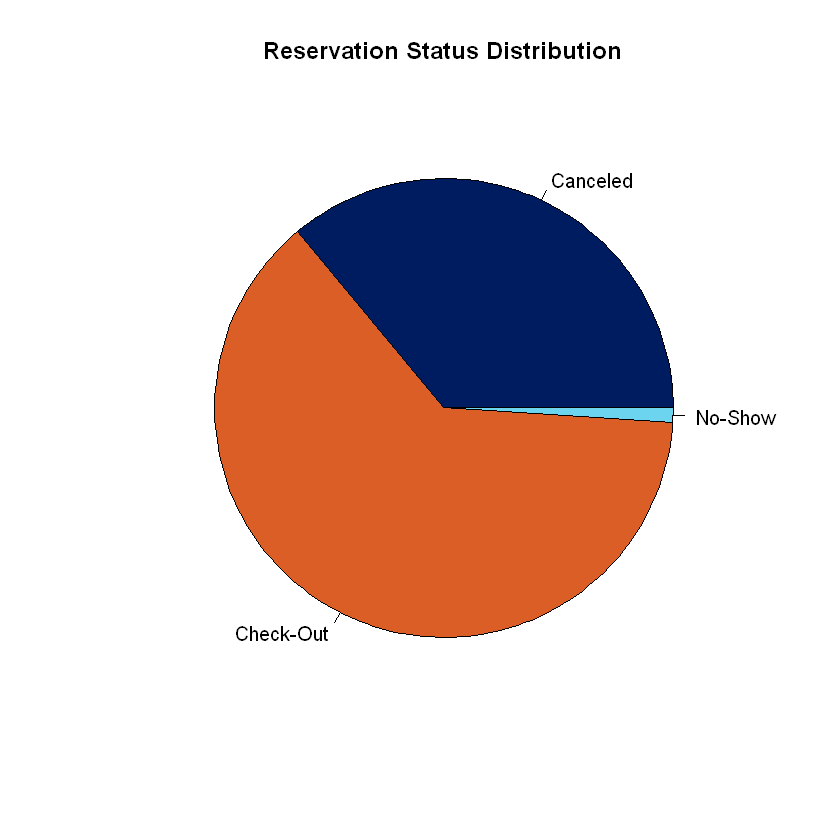

In [120]:
# Plottting pie chart for the distribution of reservation status in total bookings

custom_colors <- c("#001C60", "#DB5E27", "#6CD4EF")  # From PowerPoint Color Mixes

status_counts <- table(travelData$reservation_status)

pie(status_counts, main="Reservation Status Distribution", col=custom_colors)

In [126]:
# Various customer types 

unique(travelData$customer_type)

[1] "Transient"       "Contract"        "Transient-Party" "Group"

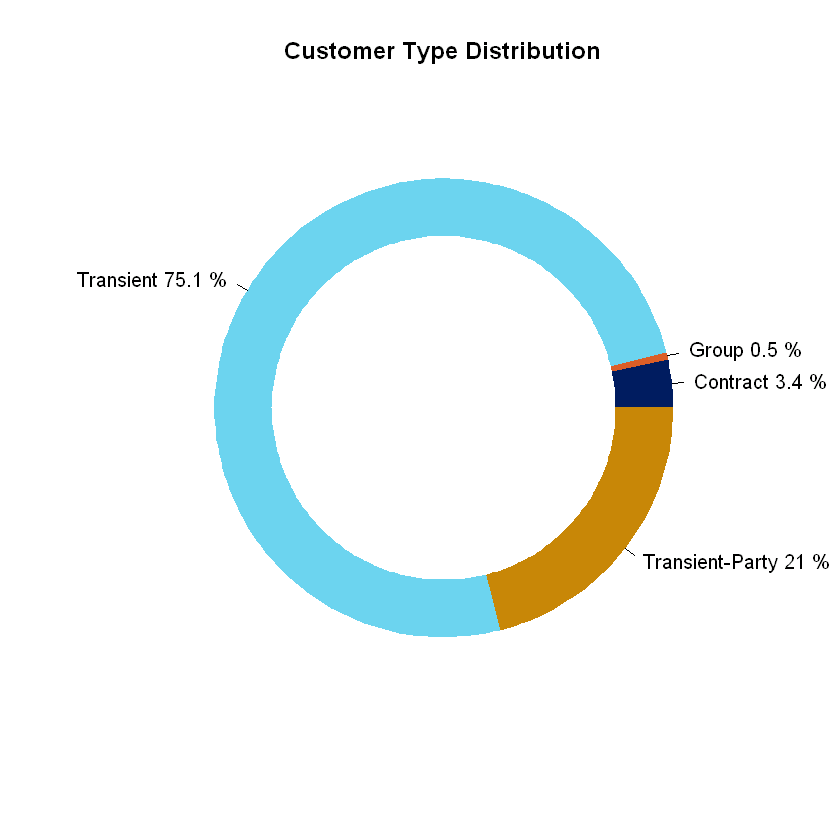

In [158]:
# Distribution of Customer Type

customer_counts <- table(travelData$customer_type)

# Define custom colors (make sure you have enough colors for all types)
custom_colors <- c("#001C60", "#DB5E27", "#6CD4EF", "#C88707")  # PowerPoint color mix

# If there are more customer types, repeat colors to match the number of types
if(length(customer_counts) > length(custom_colors)) {
  custom_colors <- rep(custom_colors, length.out = length(customer_counts))
}

# Find percentages for doughnut labels
percentages <- round(100 * customer_counts / sum(customer_counts), 1)
labels <- paste(names(customer_counts), percentages, "%")

# Creating doughnut chart
pie(customer_counts, labels = labels, main = "Customer Type Distribution", col = custom_colors, border = NA)
par(new = TRUE) # Overlay a smaller pie chart to create the hole
pie(rep(1, length(customer_counts)), radius = 0.6, col = "white", border = NA, labels = NA)

**Explanation of Customer Types** 

* Transient: Individual travelers making short-term, often one-off bookings. These bookings are typically not linked to groups or contracts.

* Contract: Bookings made under long-term agreements between hotels and entities such as businesses or organizations.

* Transient-Party: Individual travelers associated with a larger group or party, booked together but still counted as transient.

* Group: Travelers booked together as part of a larger party, often for events, meetings, or group vacations.

In [161]:
# Countries

unique(travelData$country)
length(unique(travelData$country))

[1] "PRT" "GBR" "USA" "ESP" "IRL" "FRA" "ROU" "NOR" "OMN" "ARG" "POL" "DEU"
 [13] "BEL" "CHE" "CN"  "GRC" "ITA" "NLD" "DNK" "RUS" "SWE" "AUS" "EST" "CZE"
 [25] "BRA" "FIN" "MOZ" "BWA" "LUX" "SVN" "ALB" "IND" "CHN" "MEX" "MAR" "UKR"
 [37] "SMR" "LVA" "PRI" "SRB" "CHL" "AUT" "BLR" "LTU" "TUR" "ZAF" "AGO" "ISR"
 [49] "CYM" "ZMB" "CPV" "ZWE" "DZA" "KOR" "CRI" "HUN" ""    "ARE" "TUN" "JAM"
 [61] "HRV" "HKG" "IRN" "GEO" "AND" "GIB" "URY" "JEY" "CAF" "CYP" "COL" "GGY"
 [73] "KWT" "NGA" "MDV" "VEN" "SVK" "FJI" "KAZ" "PAK" "IDN" "LBN" "PHL" "SEN"
 [85] "SYC" "AZE" "BHR" "NZL" "THA" "DOM" "MKD" "MYS" "ARM" "JPN" "LKA" "CUB"
 [97] "CMR" "BIH" "MUS" "COM" "SUR" "UGA" "BGR" "CIV" "JOR" "SYR" "SGP" "BDI"
[109] "SAU" "VNM" "PLW" "QAT" "EGY" "PER" "MLT" "MWI" "ECU" "MDG" "ISL" "UZB"
[121] "NPL" "BHS" "MAC" "TGO" "TWN" "DJI" "STP" "KNA" "ETH" "IRQ" "HND" "RWA"
[133] "KHM" "MCO" "BGD" "IMN" "TJK" "NIC" "BEN" "VGB" "TZA" "GAB" "GHA" "TMP"
[145] "GLP" "KEN" "LIE" "GNB" "MNE" "UMI" "MYT" "FRO" "MMR" "PAN" "BFA" "LBY"
[157] "MLI" "NAM" "BOL" "PRY" "BRB" "ABW" "AIA" "SLV" "DMA" "PYF" "GUY" "LCA"
[169] "ATA" "GTM" "ASM" "MRT" "NCL" "KIR" "SDN" "ATF" "SLE" "LAO"

[1] 178

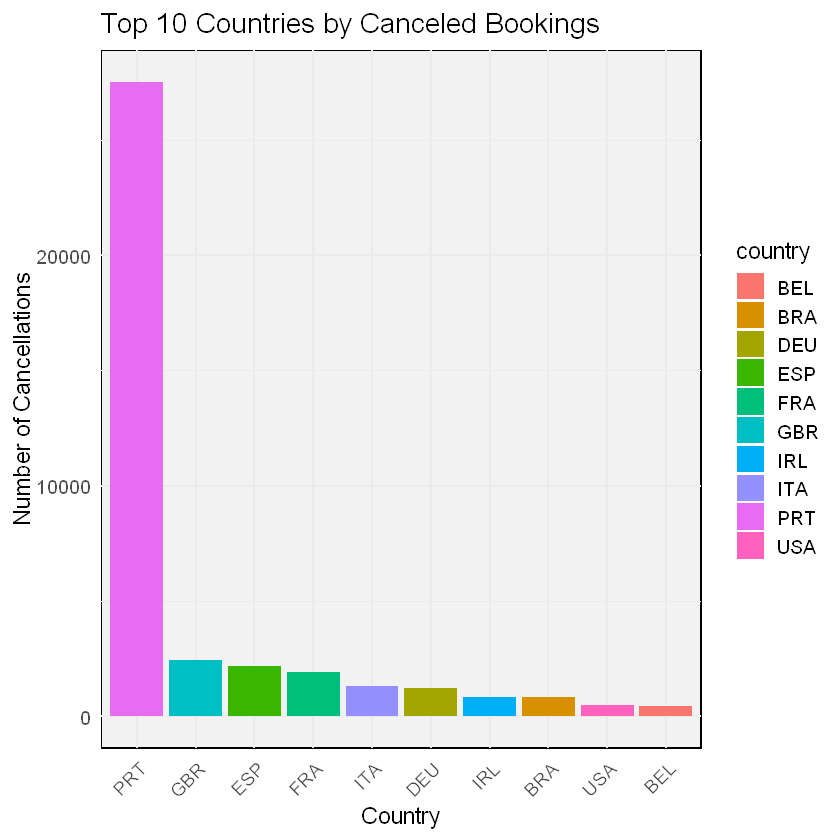

In [169]:
# Visualizing Cancelled Bookings by Countries

# Calculate canceled bookings by country based on 'is_canceled' or 'reservation_status'
cancelled_by_country <- travelData %>%
  filter(is_canceled == 1 | reservation_status == "Canceled") %>%
  group_by(country) %>%
  summarise(cancelled_bookings = n()) %>%
  arrange(desc(cancelled_bookings))

# Plot bar chart for top 10 countries
library(ggplot2)
ggplot(cancelled_by_country[1:10,], aes(x = reorder(country, -cancelled_bookings), y = cancelled_bookings, fill = country)) +
  geom_bar(stat = "identity") +
  theme_minimal(base_size = 14) +
  labs(title = "Top 10 Countries by Canceled Bookings", x = "Country", y = "Number of Cancellations") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  theme(panel.background = element_rect(fill = "#F2F2F2"))

In [183]:
# Finding the highest and lowest cancellation rates recorded by any country

# Calculate cancellation rates by country
cancellation_rates <- travelData %>%
  group_by(country) %>%
  summarise(
    total_bookings = n(),
    cancellations = sum(is_canceled == 1)
  ) %>%
  mutate(cancellation_rate = cancellations / total_bookings) %>%
  arrange(desc(cancellation_rate))

# Extract highest and lowest cancellation rates
highest_cancellation <- cancellation_rates[1, ]
lowest_cancellation <- cancellation_rates[nrow(cancellation_rates), ]

# Display results
cat("Highest Cancellation Rate:\n")
print(highest_cancellation)

cat("\nLowest Cancellation Rate:\n")
print(lowest_cancellation)

Highest Cancellation Rate:
# A tibble: 1 × 4
  country total_bookings cancellations cancellation_rate
  <chr>            <int>         <int>             <dbl>
1 BEN                  3             3                 1

Lowest Cancellation Rate:
# A tibble: 1 × 4
  country total_bookings cancellations cancellation_rate
  <chr>            <int>         <int>             <dbl>
1 UGA                  2             0                 0


#### b) Distribution of Numerical Values

Warning message:
"package 'ggplot2' was built under R version 4.4.2"
Warning message:
"`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information."


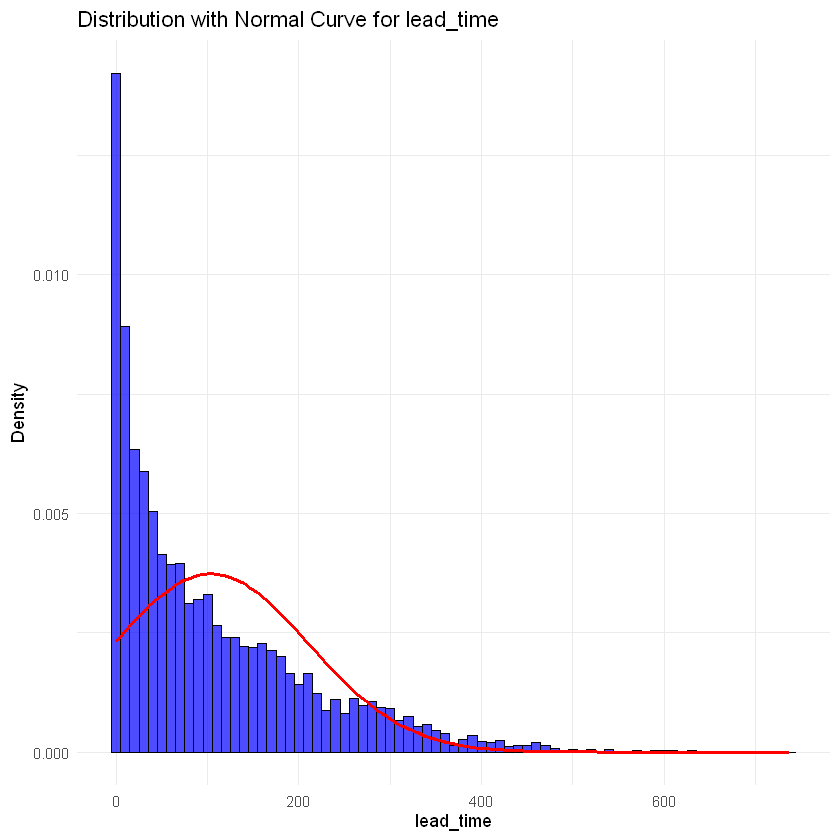

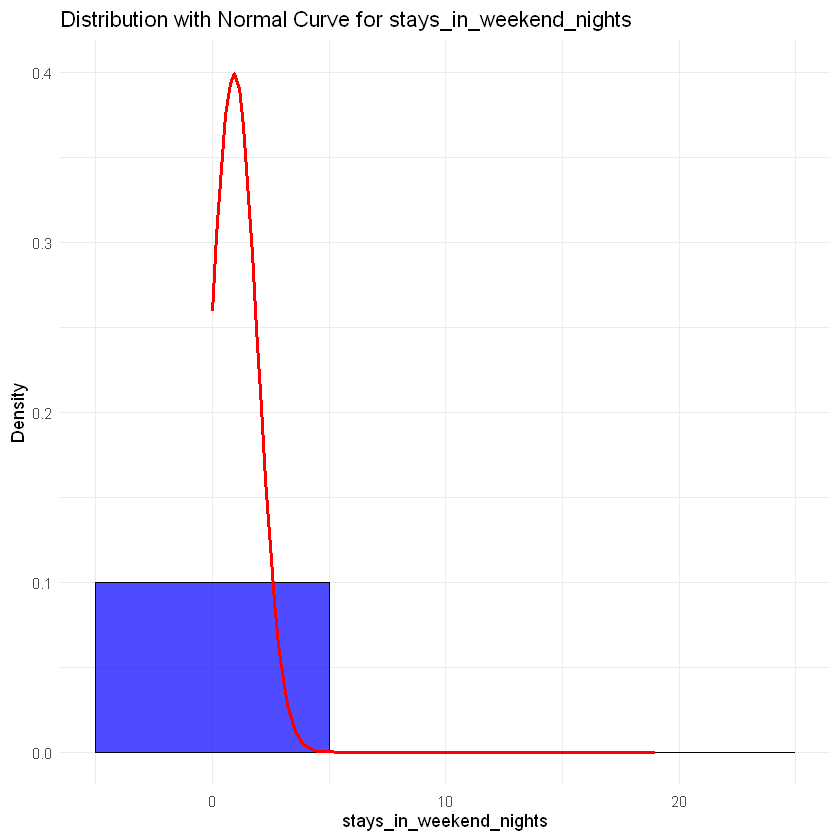

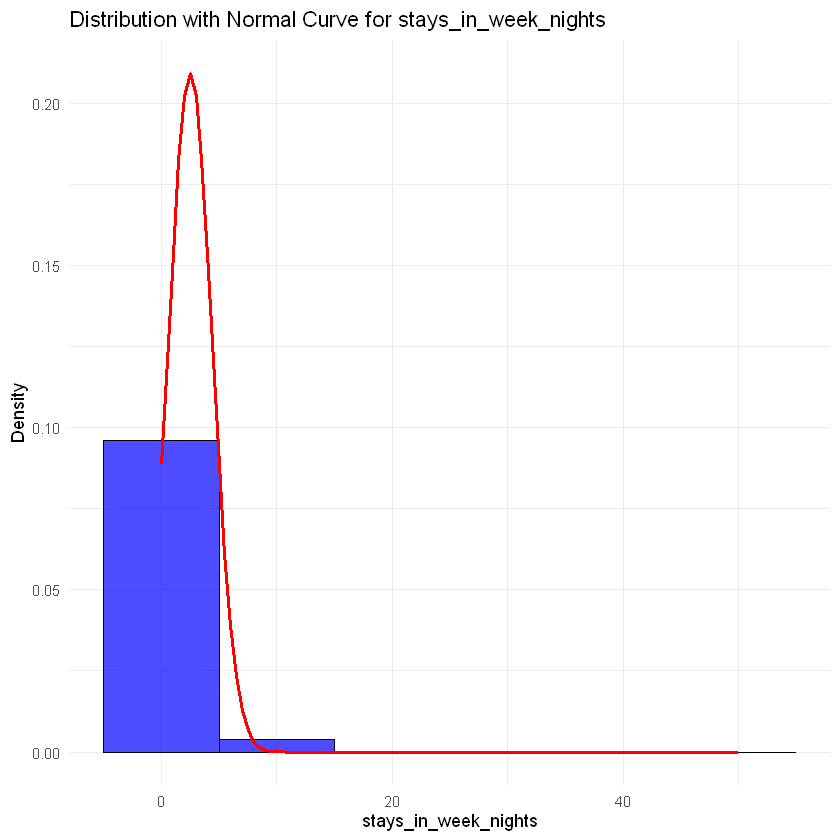

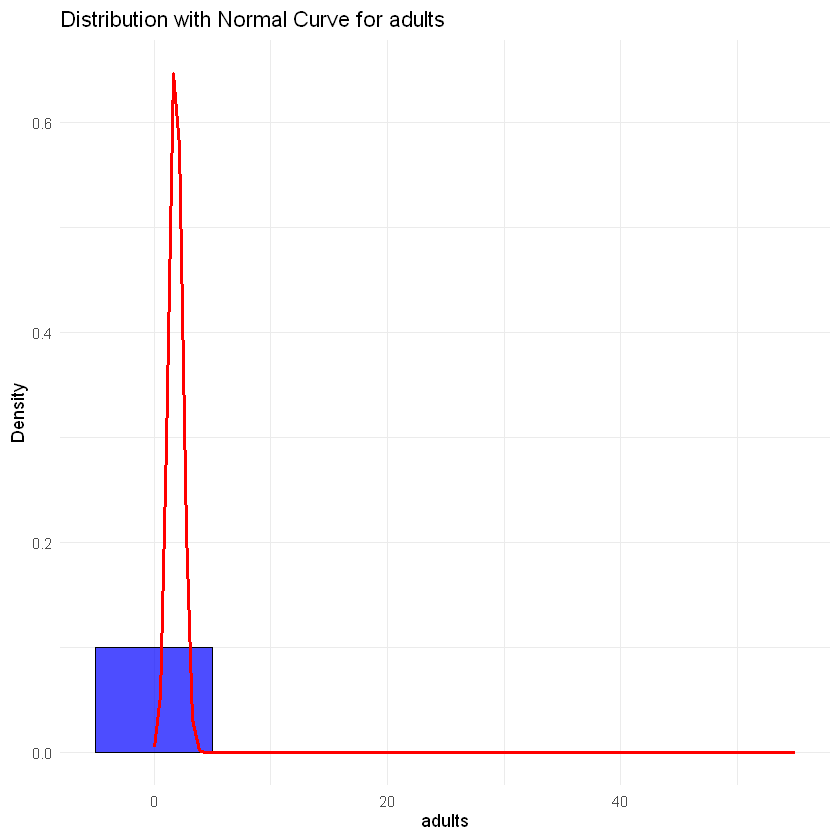

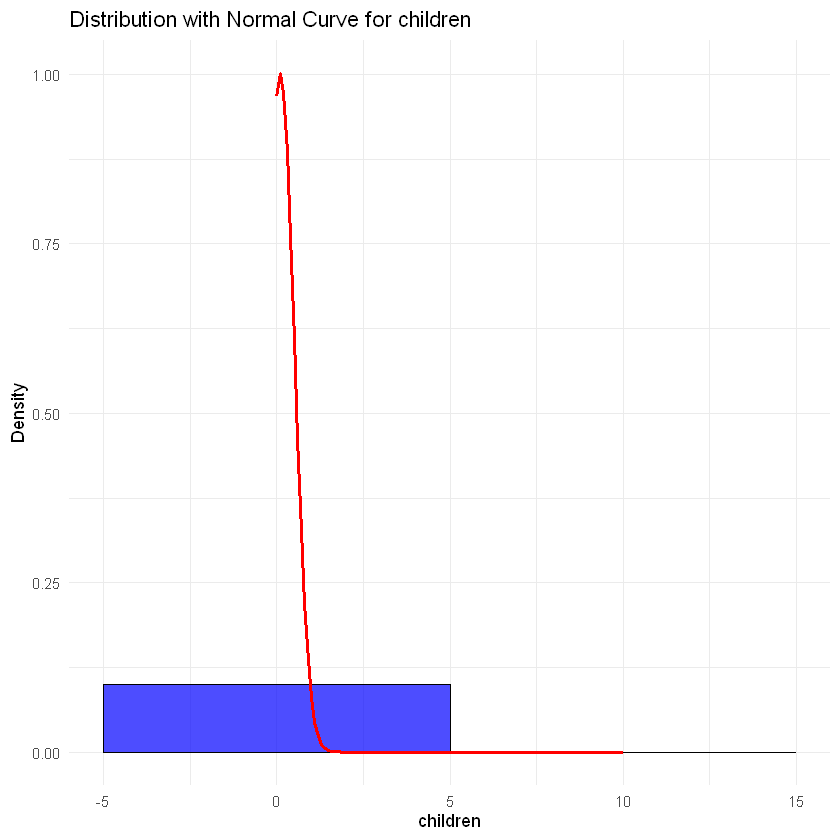

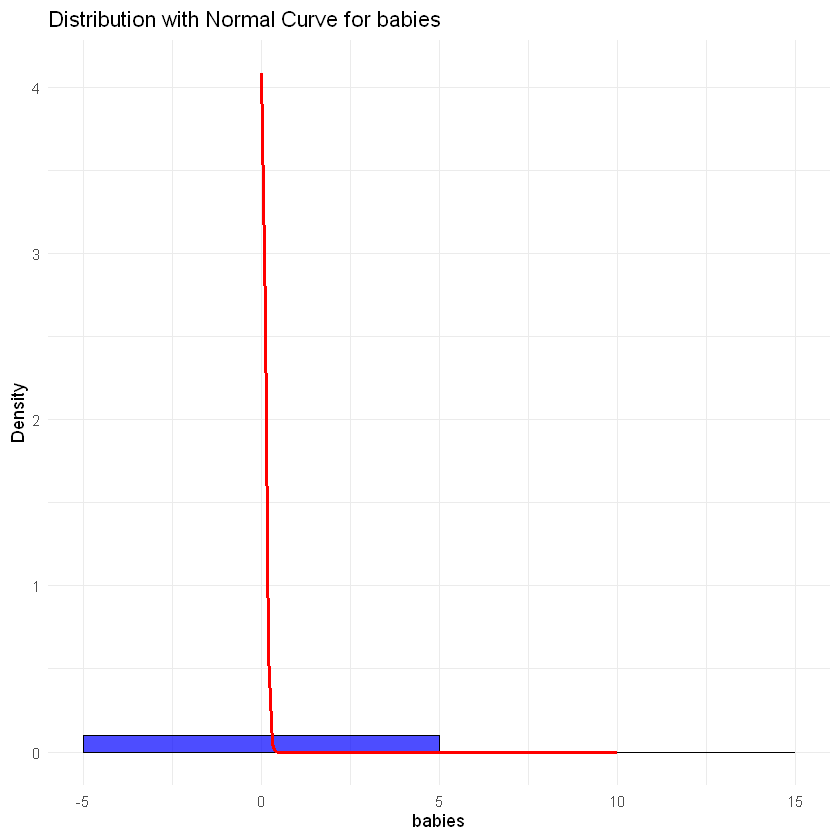

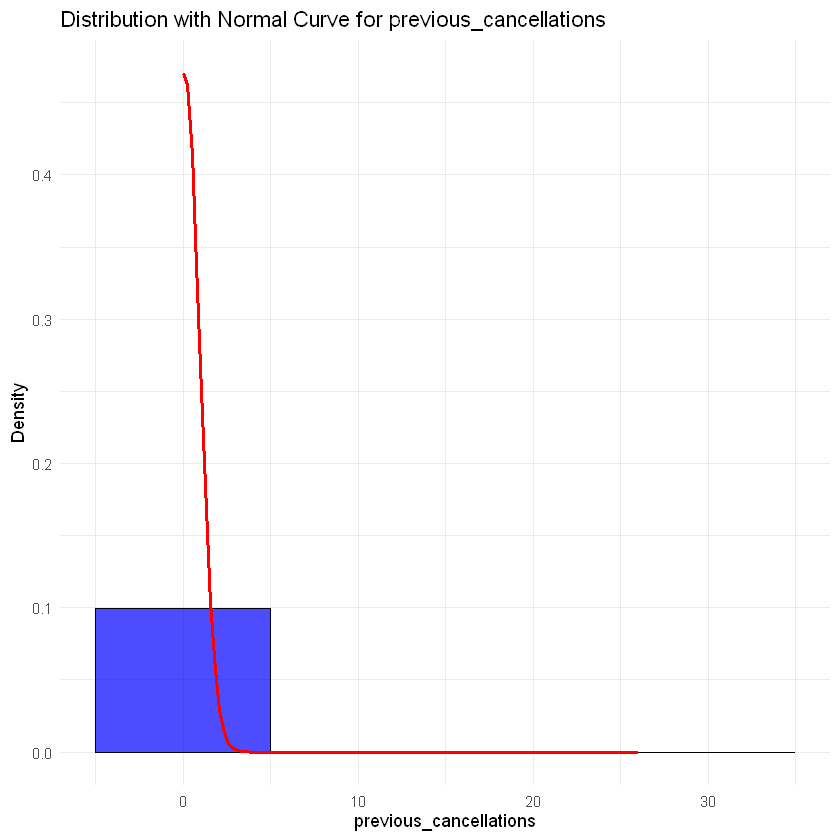

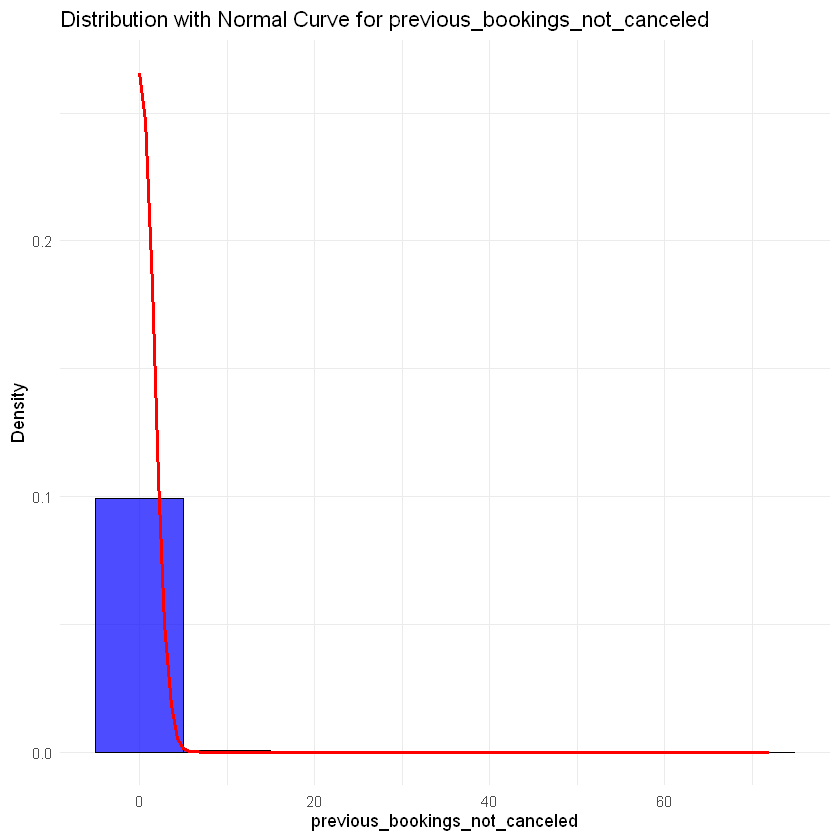

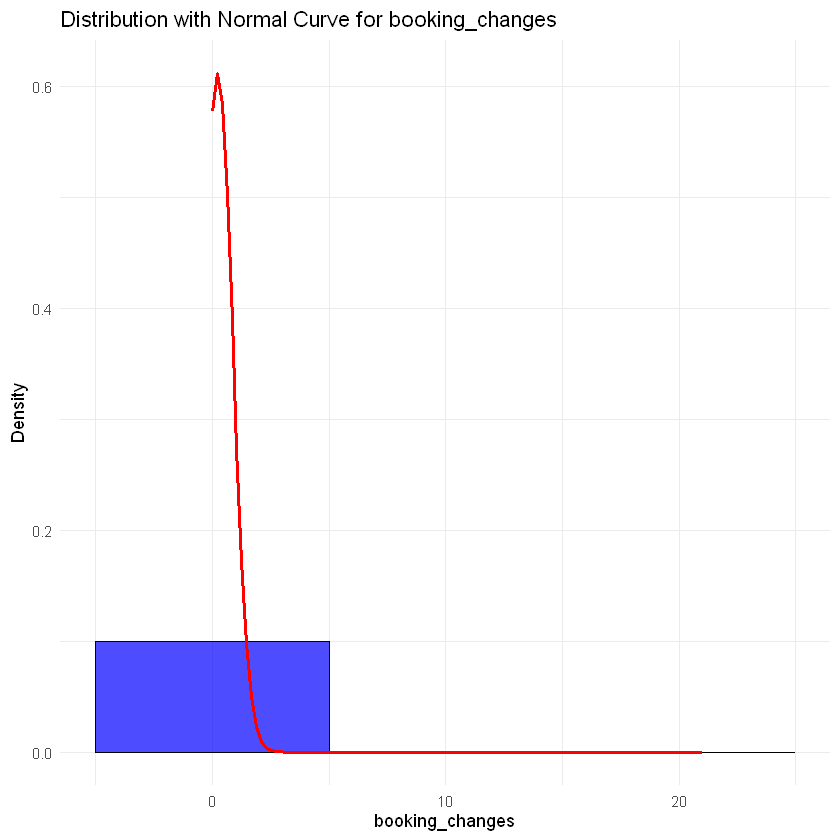

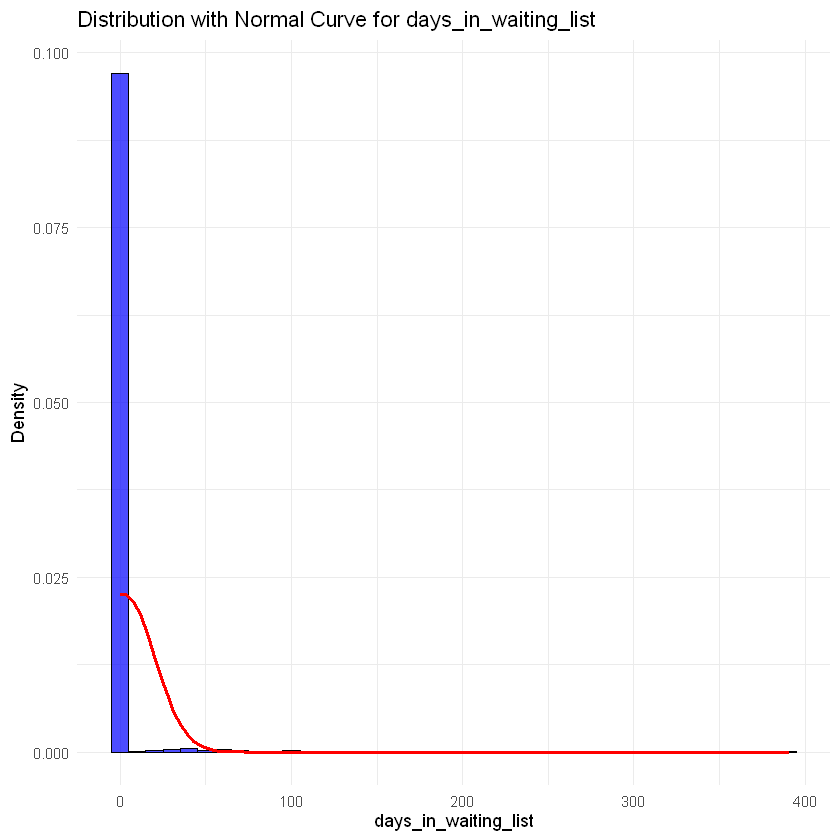

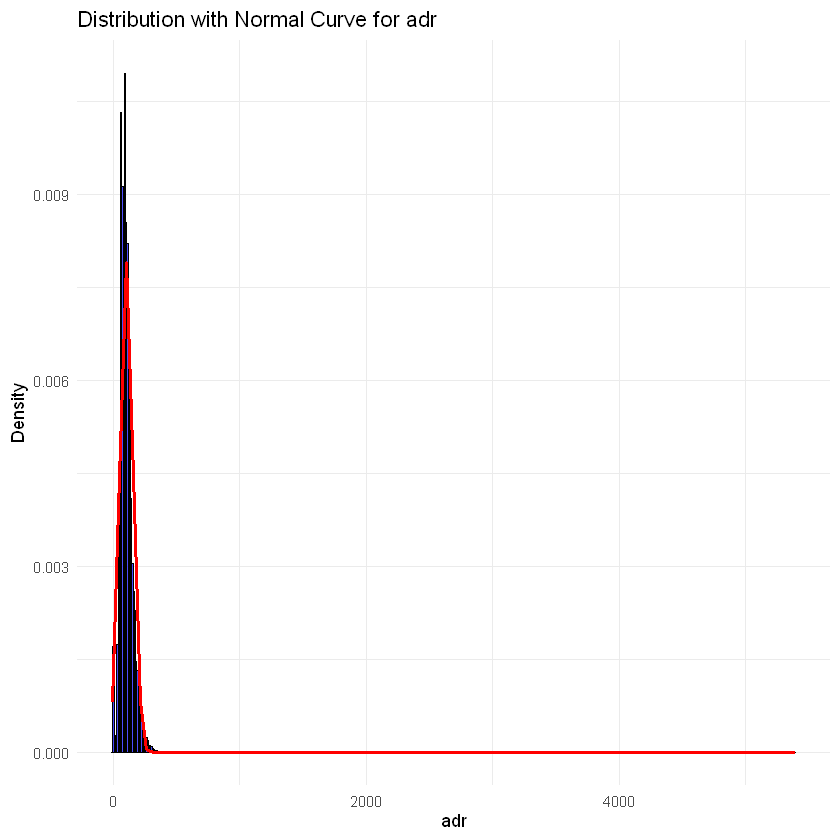

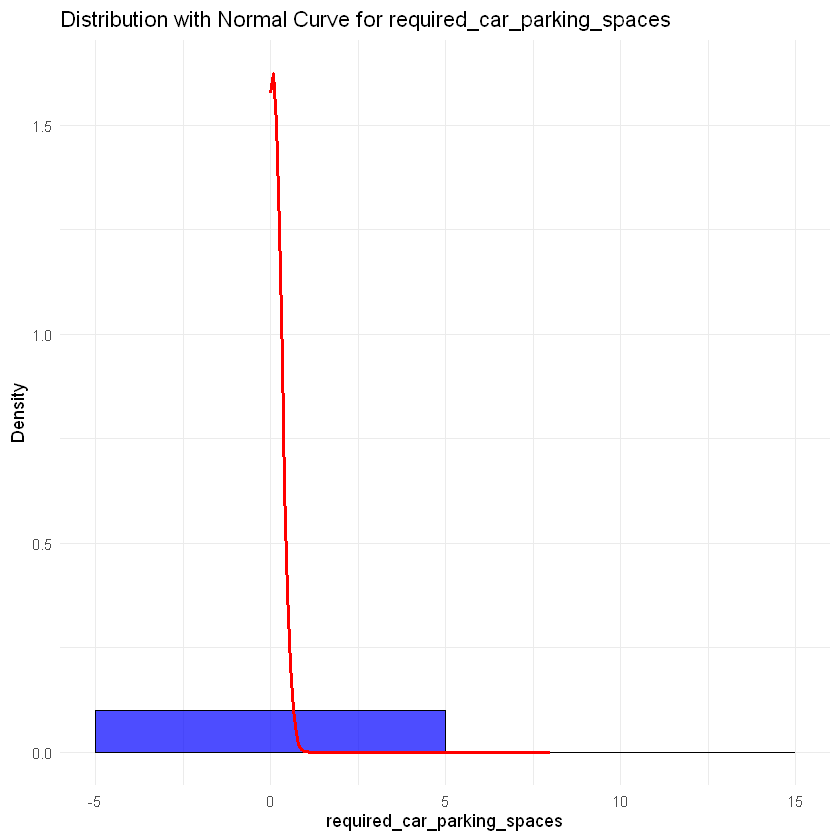

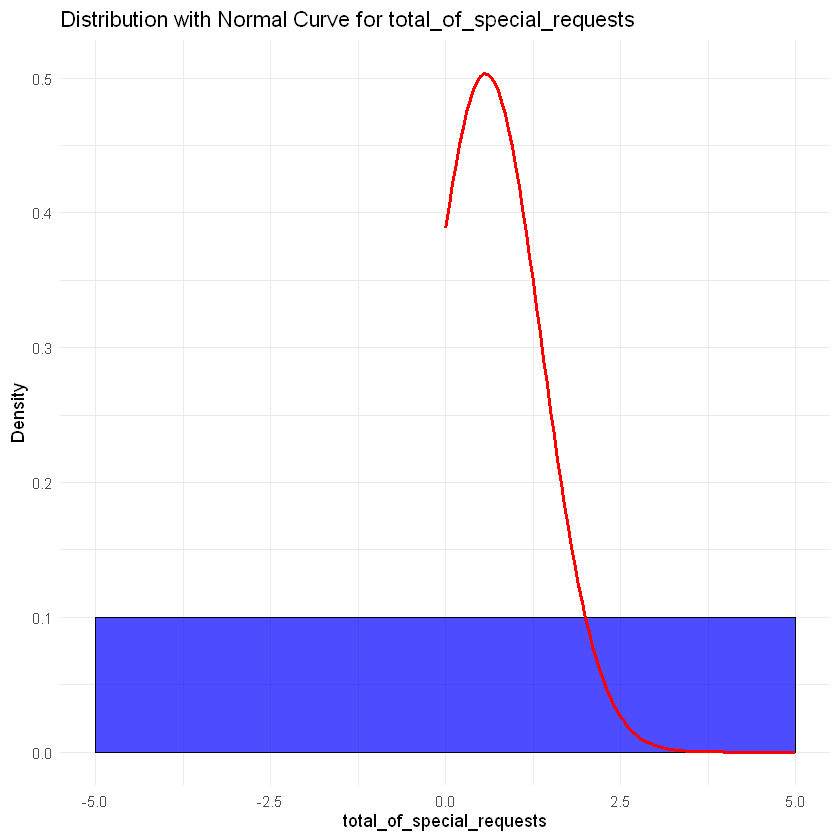

In [93]:
# Load necessary library
library(ggplot2)

# Loop through numeric variables and plot their distributions with a normal curve
for (col in quantitative_columns) {
  data_column <- travelData[[col]]  # Extract the data for the column
  print( ggplot(travelData, aes_string(x = col)) + geom_histogram(aes(y = after_stat(density)), binwidth = 10, fill = "blue", color = "black", alpha = 0.7) 
        + stat_function(fun = dnorm, args = list(mean = mean(data_column, na.rm = TRUE), sd = sd(data_column, na.rm = TRUE)), color = "red", linewidth = 1) 
        + theme_minimal() + labs(title = paste("Distribution with Normal Curve for", col), x = col, y = "Density"))
}

#### c) Correlation between Numerical Values

Warning message:
"package 'reshape2' was built under R version 4.4.2"


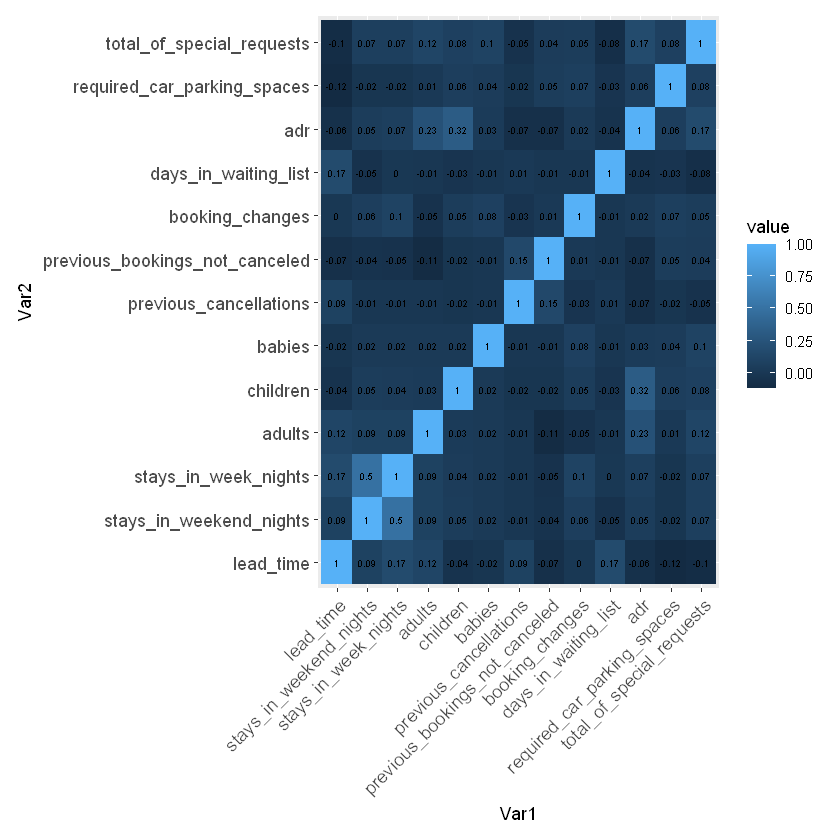

In [174]:
# Install and load reshape2 package
library(reshape2)

quantitative_data <- travelData[, quantitative_columns]

# creating correlation matrix
corr_mat <- round(cor(quantitative_data),2)
 
# reduce the size of correlation matrix
melted_corr_mat <- melt(corr_mat)
 
# plotting the correlation heatmap
library(ggplot2)
ggplot(data = melted_corr_mat, aes(x=Var1, y=Var2, 
                                   fill=value)) + 
geom_tile() +
geom_text(aes(Var2, Var1, label = value,color = "black", size = 3), 
          color = "black", size = 2) + theme(axis.text.x = element_text(angle = 45,hjust=1 ,size = 11),  # Rotate and enlarge axis text
        axis.text.y = element_text(size = 11),
        plot.margin = margin(10, 10, 10, 10)) 

In [86]:
# Calculate correlation between 'is_canceled' and quantitative variables
correlations <- sapply(quantitative_columns, function(var) {
  cor.test(as.numeric(travelData$is_canceled), travelData[[var]])$estimate
})

# Sort and get the top 8 correlations
top_correlations <- sort(correlations, decreasing = TRUE, na.last = TRUE)[1:8]
top_correlations

lead_time.cor  previous_cancellations.cor 
                0.293123356                 0.110132808 
                 adults.cor    days_in_waiting_list.cor 
                0.060017213                 0.054185824 
                    adr.cor    stays_in_week_nights.cor 
                0.047556598                 0.024764629 
               children.cor stays_in_weekend_nights.cor 
                0.005036255                -0.001791078

In [102]:
# Calculating coefficient of determination

coeff_of_det <- sapply(quantitative_columns, function(var) cor(as.numeric(travelData$is_canceled), travelData[[var]]))^2
coeff_of_det                     

lead_time        stays_in_weekend_nights 
                  8.592130e-02                   3.207961e-06 
          stays_in_week_nights                         adults 
                  6.132869e-04                   3.602066e-03 
                      children                         babies 
                  2.536386e-05                   1.055671e-03 
        previous_cancellations previous_bookings_not_canceled 
                  1.212924e-02                   3.289908e-03 
               booking_changes           days_in_waiting_list 
                  2.084587e-02                   2.936104e-03 
                           adr    required_car_parking_spaces 
                  2.261630e-03                   3.821940e-02 
     total_of_special_requests 
                  5.506427e-02

In [28]:
cor(travelData$lead_time, travelData$booking_changes, use = "complete.obs")

[1] 0.0001488301

#### d) Applying Trimming to Combat Outlier Effects

In [36]:
# List of quantitative variables
quantitative_vars <- c("lead_time", "stays_in_weekend_nights", "stays_in_week_nights", 
                       "adults", "children", "babies", "previous_cancellations", 
                       "previous_bookings_not_canceled", "booking_changes", 
                       "days_in_waiting_list", "adr", "required_car_parking_spaces", 
                       "total_of_special_requests")

# Filter function to retain only interquartile range (IQR) values
filtered_data <- travelData

for (var in quantitative_vars) {
  lower_bound <- quantile(travelData[[var]], 0.25, na.rm = TRUE)
  upper_bound <- quantile(travelData[[var]], 0.75, na.rm = TRUE)
  filtered_data <- filtered_data[filtered_data[[var]] >= lower_bound & 
                                   filtered_data[[var]] <= upper_bound, ]
}

# Check the filtered data
str(filtered_data)

'data.frame':	13161 obs. of  36 variables:
 $ hotel                         : chr  "Resort Hotel" "Resort Hotel" "Resort Hotel" "Resort Hotel" ...
 $ is_canceled                   : Factor w/ 2 levels "0","1": 2 2 2 1 1 2 2 2 1 2 ...
 $ lead_time                     : int  85 75 45 45 51 62 101 48 21 109 ...
 $ arrival_date_year             : Factor w/ 3 levels "2015","2016",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ arrival_date_month            : chr  "July" "July" "July" "July" ...
 $ arrival_date_week_number      : Factor w/ 53 levels "1","2","3","4",..: 27 27 27 27 27 27 27 27 27 27 ...
 $ arrival_date_day_of_month     : Factor w/ 31 levels "1","2","3","4",..: 1 1 2 2 3 3 3 3 3 3 ...
 $ stays_in_weekend_nights       : int  0 0 2 2 0 0 0 1 0 0 ...
 $ stays_in_week_nights          : int  3 3 3 3 2 2 2 2 1 2 ...
 $ adults                        : int  2 2 2 2 2 2 2 2 2 2 ...
 $ children                      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ babies                        : int  0 0 0 0 0 0 0 0 0 

## **2. Research Questions**

1. Does the type of hotel (City Hotel vs. Resort Hotel) significantly influence the cancellation rates of bookings for guests? In which of these Hotel types do we record the highest proportion of cancelled bookings? This will lead us to perform a Chi Square test to compare the proportions of cancellations across the two types of hotels. 
   
2. What quantitative factors (e.g., lead time, number of special requests, guest type, and booking source) are most influential in predicting whether a hotel booking will be canceled or not (i.e., the likelihood of a booking being canceled)? We shall apply Logistic Regression in answering this question. This will help us examine the relationship between quantitative variables and the probability of a booking being canceled, providing a predictive model.

## **3. Hypothesis Testing**

### i. Hypothesis 1

**Null Hypothesis($H_0$):** There is no significant difference in the cancellation rate between City Hotels and Resort Hotels.

**Alternative Hypothesis($H_1$):**  There is a significant difference in the cancellation rate between City Hotels and Resort Hotels.

#### a) Chi Square Test

In [190]:
# Create a contingency table for the two hotel types
contingency_table <- table(travelData$hotel, travelData$is_canceled)
contingency_table

# Perform Chi-squared test
chi_square_result <- chisq.test(contingency_table)
chi_square_result

              
                   0     1
  City Hotel   46228 33102
  Resort Hotel 28938 11122


	Pearson's Chi-squared test with Yates' continuity correction

data:  contingency_table
X-squared = 2224.9, df = 1, p-value < 2.2e-16


Since the p - value is significantly small, then we reject the null hypothesis at 5% significance level and conclude that the cancellation proportions or cancellation rates between the two types of hotels, namely City Hotels and Resort Hotels are significantly different.

In [193]:
# Check expected frequencies
expected <- chi_square_result$expected

# Check if any expected frequency is less than 5
min(expected)

[1] 14838.88

#### b) Testing for Assumptions of Chi Square Test

All 4 assumptions of the Chi Square Test are met:

1. Both variables are categorical: Confirmed since you’re testing two categorical variables (hotel type and cancellation status).

2. Independence of observations: Ensure each booking is independent of others (no repeated measurements).

3. Mutually exclusive cells: Each observation falls into only one cell in the contingency table.

4. Expected cell frequency: Since the minimum of the expected counts is 14838.8762877963, this assumption is met.

#### c) Visualizing Cancellation Proportions among the Hotel Types

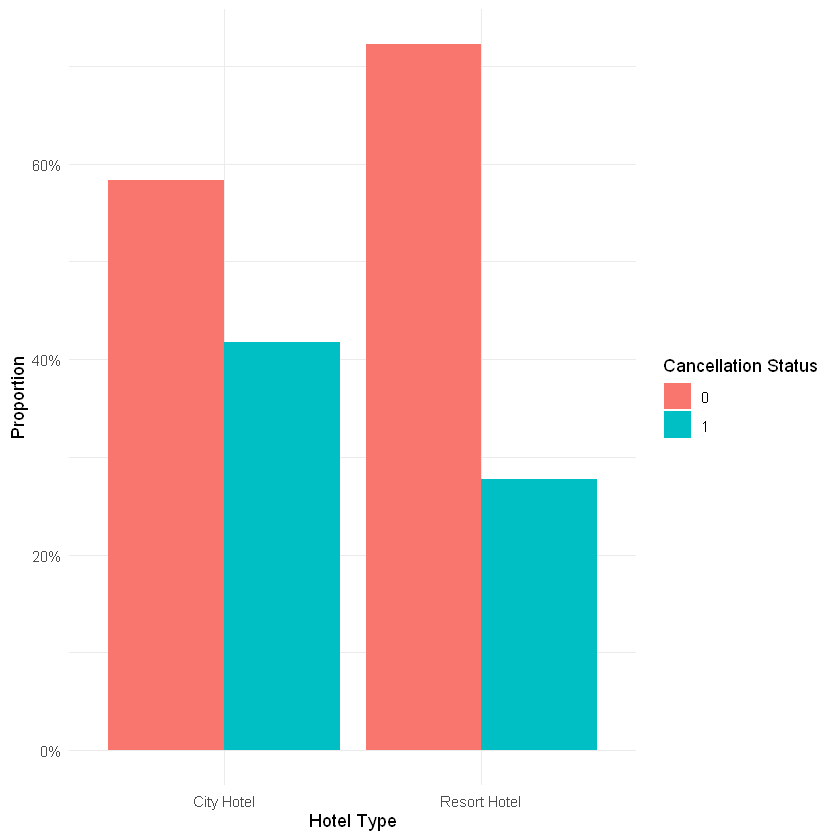

In [51]:
# Calculate proportions
prop_table <- prop.table(contingency_table, margin = 1)

# Plot the bar chart for proportions
library(ggplot2)
ggplot(as.data.frame(prop_table), aes(x = Var1, y = Freq, fill = factor(Var2))) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(x = "Hotel Type", y = "Proportion", fill = "Cancellation Status") +
  theme_minimal() +
  scale_y_continuous(labels = scales::percent)

The proportion of bookings that are cancelled is significantly higher in City Hotels than Resort Hotel.

#### d) Results of the Hypothesis Test

The result of the Chi-squared test shows a significant difference in cancellation rates between City Hotels and Resort Hotels (p-value < 2.2e-16). This indicates that the type of hotel significantly influences the cancellation rates of bookings. Also, City Hotel has more cancelled bookings than Resort Hotels, and we emphasize that their cancellation rates are statistically different.

### ii. Hypothesis 2

**Null Hypothesis($H_0$):** None of the factors (lead time, number of special requests, guest type, booking source, and their interactions) significantly influence the likelihood of a booking being canceled. Furthermore, no non-linear effects exist.

**Alternative Hypothesis($H_1$):**  At least one of the factors, including their interactions and/or non-linear effects, significantly influences the likelihood of a booking being canceled.

#### a) Fitting the Logistic Regression

In [311]:
# Logistic regression model
model <- glm(is_canceled ~ lead_time + I(lead_time^3) + total_of_special_requests + previous_cancellations + 
                       booking_changes + adr + days_in_waiting_list + lead_time:total_of_special_requests,
                     family = binomial, data = travelData)

# Summary of the model
summary(model)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = is_canceled ~ lead_time + I(lead_time^3) + total_of_special_requests + 
    previous_cancellations + booking_changes + adr + days_in_waiting_list + 
    lead_time:total_of_special_requests, family = binomial, data = travelData)

Coefficients:
                                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)                         -1.592e+00  1.955e-02 -81.440  < 2e-16 ***
lead_time                            8.353e-03  1.175e-04  71.107  < 2e-16 ***
I(lead_time^3)                      -1.458e-08  6.008e-10 -24.275  < 2e-16 ***
total_of_special_requests           -5.182e-01  1.457e-02 -35.572  < 2e-16 ***
previous_cancellations               1.567e+00  3.477e-02  45.076  < 2e-16 ***
booking_changes                     -7.494e-01  1.591e-02 -47.107  < 2e-16 ***
adr                                  6.549e-03  1.445e-04  45.304  < 2e-16 ***
days_in_waiting_list                -2.137e-03  3.572e-04  -5.983  2.2e-09 ***
lead_time:total_of_specia

#### b) Regression Diagnostics

#### I. Evaluating Model Performance

##### Odds Ratio Predictor

In [316]:
# Calculate odds ratios
exp(coef(model))

(Intercept)                           lead_time 
                          0.2034705                           1.0083882 
                     I(lead_time^3)           total_of_special_requests 
                          1.0000000                           0.5956046 
             previous_cancellations                     booking_changes 
                          4.7933095                           0.4726408 
                                adr                days_in_waiting_list 
                          1.0065701                           0.9978651 
lead_time:total_of_special_requests 
                          0.9978613

##### Identifying Important Factors

In [319]:
caret::varImp(model)

,Overall
,<dbl>
lead_time,71.106761
I(lead_time^3),24.275148
total_of_special_requests,35.572247
previous_cancellations,45.076331
booking_changes,47.106720
adr,45.303754
days_in_waiting_list,5.982636
lead_time:total_of_special_requests,20.375133


##### Pseudo R-squared (McFadden's R^2)

In [322]:
# Pseudo R-squared (McFadden's R^2)
null_deviance <- model$null.deviance
residual_deviance <- model$deviance
pseudo_r2 <- 1 - (residual_deviance / null_deviance)
pseudo_r2

[1] 0.1617694

#### II. Multicollinearity Check

In [325]:
# Variance Inflation Factor (VIF) to check for multicollinearity
library(car)
vif(model)

there are higher-order terms (interactions) in this model
consider setting type = 'predictor'; see ?vif



lead_time                      I(lead_time^3) 
                           3.313774                            2.600796 
          total_of_special_requests              previous_cancellations 
                           2.217343                            1.017991 
                    booking_changes                                 adr 
                           1.009534                            1.071989 
               days_in_waiting_list lead_time:total_of_special_requests 
                           1.049046                            2.584238

In [327]:
# Convert predicted and actual values to factors with the same levels
library(caret)
predicted <- factor(ifelse(fitted(model) > 0.5, "1", "0"), levels = c("0", "1"))
actual <- factor(travelData$is_canceled, levels = c("0", "1"))

# Generate the confusion matrix
conf_matrix <- confusionMatrix(predicted, actual)
print(conf_matrix)

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 65813 23455
         1  9353 20769
                                          
               Accuracy : 0.7252          
                 95% CI : (0.7227, 0.7277)
    No Information Rate : 0.6296          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.3694          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.8756          
            Specificity : 0.4696          
         Pos Pred Value : 0.7373          
         Neg Pred Value : 0.6895          
             Prevalence : 0.6296          
         Detection Rate : 0.5512          
   Detection Prevalence : 0.7477          
      Balanced Accuracy : 0.6726          
                                          
       'Positive' Class : 0               
                  

We admit that our model might not be the best possible fit. However, it does provide useful insights into the relationships between the quantitative variables and the likelihood of a customer canceling a booking. This helps answer our hypothesis question and adds to our understanding of the factors influencing cancellations.

#### c) Results of Hypothesis Test

The logistic regression analysis shows that the quantitative variables in our dataset (e.g., lead time, special requests, booking changes, etc.) have a statistically significant effect on the likelihood of hotel booking cancellations. \
This aligns with our alternative hypothesis that at least one factor significantly influences cancellations. 

The significant coefficients imply that these variables can be reliably used to predict the likelihood of cancellation.

Future analysis could focus on refining the logistic regression model by exploring interactions, non-linear effects, and model selection criteria such as AIC and BIC to identify the best fit. Ultimately, these significant variables can be used to develop a predictive tool for identifying high-risk bookings and enabling proactive management strategies.

## **4. Analysing Effects of Simulated Missing Data**

We shall simulate two types of missing data. These are

1. MCAR: Missing Completely at Random
2. MNAR: Missing Not at Random

### i) Simulating and Analysing Effects of MCAR Missing Values

We shall simulate for the following variables:

1. is_canceled (binary):

In the context of our hotel booking dataset, MCAR could happen if cancellations are missing due to random data entry errors, such as system glitches or inconsistencies during booking processing, or if the cancellation status is omitted randomly when booking information is collected, without regard to any other booking details like lead time or guest type. Additionally, it could occur if some booking records are randomly excluded from the dataset, unrelated to whether a booking was canceled or not. In this case, the missingness would not be biased by any observed or unobserved variables, ensuring that the analysis remains unbiased and valid.

2. lead_time (quantitative):

Missing values for lead time might occur randomly due to issues like system glitches, human error during booking entry, or technical problems during data collection. For instance, if the lead time for some bookings was not captured properly because of a temporary issue with the booking platform, this would be an example of MCAR.

3. total_of_special_requests

The missing values for the number of special requests could be missing completely at random if, for instance, some bookings didn't have special requests recorded due to oversight or error during the booking process. This could occur without any systematic pattern or relationship to the other varibales.

4. adr

If there were occasional issues during data processing or extraction that led to missing adr values for some bookings, such as data extraction errors or missed payments, this could be considered MCAR. For example, if some bookings were missing Average Daily Rate (adr) due to administrative oversight in the data recording process, this would be an example of MCAR.

We shall handle the MCAR missing values by simply ignoring or omitting the blank cells, in our analysis.

#### Simulating 10% MCAR on is_canceled

In [336]:
# Set seed for reproducibility
set.seed(42)

# Simulate 10% missing data (MCAR) in is_canceled column
missing_percentage <- 0.1
n_missing <- floor(missing_percentage * nrow(travelData))

# Create random indices to simulate missing data
missing_indices <- sample(1:nrow(travelData), n_missing)

# Set the 'is_canceled' column values for these indices to NA
travelData_mcar_10 <- travelData
travelData_mcar_10$is_canceled[missing_indices] <- NA

In [338]:
colSums(is.na(travelData_mcar_10))

hotel                    is_canceled 
                             0                          11939 
                     lead_time              arrival_date_year 
                             0                              0 
            arrival_date_month       arrival_date_week_number 
                             0                              0 
     arrival_date_day_of_month        stays_in_weekend_nights 
                             0                              0 
          stays_in_week_nights                         adults 
                             0                              0 
                      children                         babies 
                             0                              0 
                          meal                        country 
                             0                              0 
                market_segment           distribution_channel 
                             0                              0 
             is_repeated_guest         previous_cancellations 
                             0                              0 
previous_bookings_not_canceled             reserved_room_type 
                             0                              0 
            assigned_room_type                booking_changes 
                             0                              0 
                  deposit_type                          agent 
                             0                          16340 
                       company           days_in_waiting_list 
                        112593                              0 
                 customer_type                            adr 
                             0                              0 
   required_car_parking_spaces      total_of_special_requests 
                             0                              0 
            reservation_status        reservation_status_date 
                             0                              0 
                          name                          email 
                             0                              0 
                  phone.number                    credit_card 
                             0                              0

#### Re-performing the Chi Square Test

In [341]:
# Create a contingency table for the two hotel types with missing data
contingency_table_mcar_10 <- table(travelData_mcar_10$hotel, travelData_mcar_10$is_canceled, useNA = "ifany")
contingency_table_mcar_10

# Perform Chi-squared test with MCAR 10% missing data
chi_square_result_mcar_10 <- chisq.test(contingency_table_mcar_10)

# Print the result of the Chi-squared test
chi_square_result_mcar_10

              
                   0     1  <NA>
  City Hotel   41632 29782  7916
  Resort Hotel 26074  9963  4023


	Pearson's Chi-squared test

data:  contingency_table_mcar_10
X-squared = 2030.1, df = 2, p-value < 2.2e-16


Although the conclusion is the same that the proportions of canceled bookings is significantly different between the two Hotel types, we observe that the test statistic value increased from X-squared = 2224.9 with df = 1 to X-squared = 2030.1 with df = 2, suggesting that the missing values may have caused a loss of significant information, affecting the strength of the association between the hotel type and cancellation rates. The decrease in the test statistic indicates that the missing data may have diluted the observed relationship, which is important to consider when interpreting the results.

#### Simulating 30% MCAR on is_canceled

In [345]:
# Set seed for reproducibility
set.seed(42)

# Simulate 10% missing data (MCAR) in is_canceled column
missing_percentage <- 0.3
n_missing <- floor(missing_percentage * nrow(travelData))

# Create random indices to simulate missing data
missing_indices <- sample(1:nrow(travelData), n_missing)

# Set the 'is_canceled' column values for these indices to NA
travelData_mcar_30 <- travelData
travelData_mcar_30$is_canceled[missing_indices] <- NA

#### Re-performing the Chi Square Test

In [348]:
# Create a contingency table for the two hotel types with missing data
contingency_table_mcar_30 <- table(travelData_mcar_30$hotel, travelData_mcar_30$is_canceled, useNA = "ifany")
contingency_table_mcar_30

# Perform Chi-squared test with MCAR 10% missing data
chi_square_result_mcar_30 <- chisq.test(contingency_table_mcar_30)

# Print the result of the Chi-squared test
chi_square_result_mcar_30

              
                   0     1  <NA>
  City Hotel   32461 23101 23768
  Resort Hotel 20299  7712 12049


	Pearson's Chi-squared test

data:  contingency_table_mcar_30
X-squared = 1577.5, df = 2, p-value < 2.2e-16


Likewise, the hypothesis conclusion does not change, however the test statistic value drops massively, showing a reduction in the effectiveness of the test in finding the difference in proportions of canceled bookings between the hotel types.

#### Simulating 10% MCAR on lead_time, total_of_special_requests and adr

In [352]:
# Set seed for reproducibility
set.seed(123)

# Simulate 10% MCAR for 'lead_time', 'total_of_special_requests', and 'adr'
simulate_mcar <- function(data, variable, missing_percentage = 0.10) {
  # Create a vector of random indices where the data will be missing
  missing_indices <- sample(1:nrow(data), size = floor(missing_percentage * nrow(data)), replace = FALSE)
  
  # Set the selected variable's values at these indices to NA
  data[missing_indices, variable] <- NA
  return(data)
}

# Apply the MCAR simulation to the three selected variables
travelData_mcar_r10 <- travelData

travelData_mcar_r10 <- simulate_mcar(travelData_mcar_r10, "lead_time", 0.20)
travelData_mcar_r10 <- simulate_mcar(travelData_mcar_r10, "total_of_special_requests", 0.20)
travelData_mcar_r10 <- simulate_mcar(travelData_mcar_r10, "adr", 0.20)

In [354]:
# Check the result
colSums(is.na(travelData_mcar_r10))  # This will show the number of missing values in each column

hotel                    is_canceled 
                             0                              0 
                     lead_time              arrival_date_year 
                         23878                              0 
            arrival_date_month       arrival_date_week_number 
                             0                              0 
     arrival_date_day_of_month        stays_in_weekend_nights 
                             0                              0 
          stays_in_week_nights                         adults 
                             0                              0 
                      children                         babies 
                             0                              0 
                          meal                        country 
                             0                              0 
                market_segment           distribution_channel 
                             0                              0 
             is_repeated_guest         previous_cancellations 
                             0                              0 
previous_bookings_not_canceled             reserved_room_type 
                             0                              0 
            assigned_room_type                booking_changes 
                             0                              0 
                  deposit_type                          agent 
                             0                          16340 
                       company           days_in_waiting_list 
                        112593                              0 
                 customer_type                            adr 
                             0                          23878 
   required_car_parking_spaces      total_of_special_requests 
                             0                          23878 
            reservation_status        reservation_status_date 
                             0                              0 
                          name                          email 
                             0                              0 
                  phone.number                    credit_card 
                             0                              0

#### Performing Logistic Regression with 10% MCAR on lead_time, total_of_special_requests and adr

In [357]:
# Handle missing data by removing rows with missing values (listwise deletion)
travelData_mcar_clean <- na.omit(travelData_mcar_r10)

# Fit logistic regression model on the modified dataset with MCAR missing values
log_model_mcar <- glm(is_canceled ~ lead_time + I(lead_time^3) + total_of_special_requests + previous_cancellations + 
                       booking_changes + adr + days_in_waiting_list + lead_time:total_of_special_requests, 
                       family = binomial, data = travelData_mcar_clean)

# Summary of the new logistic regression model
summary(log_model_mcar)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = is_canceled ~ lead_time + I(lead_time^3) + total_of_special_requests + 
    previous_cancellations + booking_changes + adr + days_in_waiting_list + 
    lead_time:total_of_special_requests, family = binomial, data = travelData_mcar_clean)

Coefficients: (1 not defined because of singularities)
                                      Estimate Std. Error z value Pr(>|z|)   
(Intercept)                         -3.449e+00  1.083e+00  -3.184  0.00145 **
lead_time                            2.386e-02  2.314e-02   1.031  0.30256   
I(lead_time^3)                      -5.429e-07  5.070e-07  -1.071  0.28428   
total_of_special_requests           -1.673e+01  3.050e+03  -0.005  0.99562   
previous_cancellations              -2.178e-01  5.531e+03   0.000  0.99997   
booking_changes                     -2.695e-02  3.811e-01  -0.071  0.94362   
adr                                  1.159e-02  9.005e-03   1.287  0.19812   
days_in_waiting_list                        NA         NA   

After simulating 10% MCAR for the variables lead_time, total_of_special_requests, and adr, we see that all the variables lose their significance in the logistic regression model. This means the model can no longer explain the likelihood of a booking being canceled. In relation to our hypothesis, we would fail to reject the null hypothesis, meaning we can't conclude that any of the variables significantly affect cancellations. 

#### Simulating 20% MCAR on lead_time, total_of_special_requests and adr

In [362]:
# Set seed for reproducibility
set.seed(123)

# Simulate 10% MCAR for 'lead_time', 'total_of_special_requests', and 'adr'
simulate_mcar <- function(data, variable, missing_percentage = 0.20) {
  # Create a vector of random indices where the data will be missing
  missing_indices <- sample(1:nrow(data), size = floor(missing_percentage * nrow(data)), replace = FALSE)
  
  # Set the selected variable's values at these indices to NA
  data[missing_indices, variable] <- NA
  return(data)
}

# Apply the MCAR simulation to the three selected variables
travelData_mcar_r20 <- travelData

travelData_mcar_r20 <- simulate_mcar(travelData_mcar_r20, "lead_time", 0.20)
travelData_mcar_r20 <- simulate_mcar(travelData_mcar_r20, "total_of_special_requests", 0.20)
travelData_mcar_r20 <- simulate_mcar(travelData_mcar_r20, "adr", 0.20)

In [364]:
# Check the result
colSums(is.na(travelData_mcar_r20))  

hotel                    is_canceled 
                             0                              0 
                     lead_time              arrival_date_year 
                         23878                              0 
            arrival_date_month       arrival_date_week_number 
                             0                              0 
     arrival_date_day_of_month        stays_in_weekend_nights 
                             0                              0 
          stays_in_week_nights                         adults 
                             0                              0 
                      children                         babies 
                             0                              0 
                          meal                        country 
                             0                              0 
                market_segment           distribution_channel 
                             0                              0 
             is_repeated_guest         previous_cancellations 
                             0                              0 
previous_bookings_not_canceled             reserved_room_type 
                             0                              0 
            assigned_room_type                booking_changes 
                             0                              0 
                  deposit_type                          agent 
                             0                          16340 
                       company           days_in_waiting_list 
                        112593                              0 
                 customer_type                            adr 
                             0                          23878 
   required_car_parking_spaces      total_of_special_requests 
                             0                          23878 
            reservation_status        reservation_status_date 
                             0                              0 
                          name                          email 
                             0                              0 
                  phone.number                    credit_card 
                             0                              0

#### Performing Logistic Regression with 20% MCAR on lead_time, total_of_special_requests and adr

In [367]:
# Handle missing data by removing rows with missing values (listwise deletion)
travelData_mcar_clean <- na.omit(travelData_mcar_r20)

# Fit logistic regression model on the modified dataset with MCAR missing values
log_model_mcar <- glm(is_canceled ~ lead_time + I(lead_time^3) + total_of_special_requests + previous_cancellations + 
                       booking_changes + adr + days_in_waiting_list + lead_time:total_of_special_requests, 
                       family = binomial, data = travelData_mcar_clean)

# Summary of the new logistic regression model
summary(log_model_mcar)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = is_canceled ~ lead_time + I(lead_time^3) + total_of_special_requests + 
    previous_cancellations + booking_changes + adr + days_in_waiting_list + 
    lead_time:total_of_special_requests, family = binomial, data = travelData_mcar_clean)

Coefficients: (1 not defined because of singularities)
                                      Estimate Std. Error z value Pr(>|z|)   
(Intercept)                         -3.449e+00  1.083e+00  -3.184  0.00145 **
lead_time                            2.386e-02  2.314e-02   1.031  0.30256   
I(lead_time^3)                      -5.429e-07  5.070e-07  -1.071  0.28428   
total_of_special_requests           -1.673e+01  3.050e+03  -0.005  0.99562   
previous_cancellations              -2.178e-01  5.531e+03   0.000  0.99997   
booking_changes                     -2.695e-02  3.811e-01  -0.071  0.94362   
adr                                  1.159e-02  9.005e-03   1.287  0.19812   
days_in_waiting_list                        NA         NA   

Clearly, all the variables loose their significance and that we cannot use the model to explain the likelihood or factors affecting hotel booking cancelations. With 20% MCAR on the three independent variables, we shall fail to reject our null hypothesis and conclude that non of the variables have significant influence on booking cancelations. The more missing data we have, the less reliable the model becomes in identifying the factors that influence cancellations

In [371]:
# Pseudo R-squared (McFadden's R^2)
null_deviance <- log_model_mcar$null.deviance
residual_deviance <- log_model_mcar$deviance
pseudo_r2 <- 1 - (residual_deviance / null_deviance)
pseudo_r2

[1] 0.09016856

### ii) Simulating and Analysing Effects of MNAR Missing Values

We shall simulate MNAR for the following variables:

1. is_canceled (binary):

In the context of MNAR, the missing values for the is_canceled variable could occur if cancellations are more likely to be missing for certain types of bookings or under certain circumstances. For instance, if canceled bookings are more likely to be missing because they were not properly recorded or excluded intentionally due to errors in the cancellation process (such as issues with payment or customer dissatisfaction), the missing data would be systematically related to the outcome of the booking. This would indicate that the missingness is not random and could lead to biased results if not handled properly.

2. lead_time (quantitative):

If lead time values are missing for bookings that were made closer to the date of stay (for example, last-minute bookings), the missingness would not be random. This could occur if the lead time for late bookings is less likely to be recorded accurately due to rushed data entry or issues with the booking system under time pressure. Since the missingness is related to the timing of the booking (a variable we care about), this would qualify as missing not at random (MNAR).

3. total_of_special_requests

The total_of_special_requests variable could be missing in cases where certain customer profiles, such as those with fewer special requests or lower expectations, are less likely to have their special requests recorded. For instance, if guests who tend to make fewer special requests or who book through agents are more likely to have missing data for this field, the missingness would be related to the underlying customer behavior, making it MNAR.

4. adr

Missing values for adr (Average Daily Rate) could be MNAR if the missingness is tied to certain types of bookings, such as those where guests received discounts, made partial payments, or had issues with billing. For example, bookings where the customer was dissatisfied with the price or had special agreements on rates might not have the adr recorded. This would suggest that the missingness is related to the value of the variable itself, and not random.

In the case of MNAR, we cannot simply ignore or omit the missing values without risking biased conclusions. Instead, we would need to fill the empty cells.  More specifically, we shall use replacement of arbitrary value. In the is_canceled, we shall take any missing entry as a zero. In the three other quantitative variables, we shall replace each missing value with the mean of the respective column.

#### Simulating MNAR on is_canceled: 30% missing values for bookings with a lead_time greater than 100 and 10% missing values for bookings with a lead_time less than or equal to 100

In [376]:
# Create a copy of the original dataset to preserve it
travelData_copy <- travelData

# Simulate MNAR missing values in the 'is_canceled' column for the copy of the dataset
set.seed(123)  # For reproducibility

# Define missing probability
missing_prob_high_lead_time <- 0.3
missing_prob_low_lead_time <- 0.1

# Generate missing values for 'is_canceled' based on the lead_time thresholds
travelData_copy$is_canceled[travelData_copy$lead_time > 100 & runif(nrow(travelData_copy)) < missing_prob_high_lead_time] <- NA
travelData_copy$is_canceled[travelData_copy$lead_time <= 100 & runif(nrow(travelData_copy)) < missing_prob_low_lead_time] <- NA

In [378]:
# Check how many missing values there are in 'is_canceled'
sum(is.na(travelData_copy$is_canceled))

[1] 21369

#### Performing Replacement of Missing Values

In [381]:
# Create a copy of the dataset to preserve the original
travelData_copy <- travelData

# Replace missing values (NA) in 'is_canceled' with 0
travelData_copy$is_canceled[is.na(travelData_copy$is_canceled)] <- 0

In [383]:
sum(is.na(travelData_copy$is_canceled))

[1] 0

#### Re-performing the Chi Square Test

In [386]:
# First, generate a contingency table with 'hotel' and 'is_canceled'
contingency_table_mnar_30_10 <- table(travelData_copy$hotel, travelData_copy$is_canceled)
contingency_table_mnar_30_10

# Perform the chi-square test
chi_square_result_mnar_30_10 <- chisq.test(contingency_table_mnar_30_10)
chi_square_result_mnar_30_10

              
                   0     1
  City Hotel   46228 33102
  Resort Hotel 28938 11122


	Pearson's Chi-squared test with Yates' continuity correction

data:  contingency_table_mnar_30_10
X-squared = 2224.9, df = 1, p-value < 2.2e-16


The X-squared value remained the same at 2224.9 after replacing missing values with 0, suggesting that the strength of the association between hotel type and booking cancellations was not significantly affected by the imputation method. Despite the imputation of missing values, the p-value remained highly significant, indicating that the relationship between hotel type and booking cancellations remains statistically significant, even when handling missing data in this way. However, this outcome assumes that the missingness was random and does not account for potential biases that might arise from MNAR missing data.

#### Simulating MNAR on is_canceled: 50% missing values for bookings with a lead_time greater than 100 and 20% missing values for bookings with a lead_time less than or equal to 100

In [390]:
# Create a copy of the original dataset to preserve it
travelData_copy <- travelData

# Simulate MNAR missing values in the 'is_canceled' column for the copy of the dataset
set.seed(123)  # For reproducibility

# Define missing probability
missing_prob_high_lead_time <- 0.5
missing_prob_low_lead_time <- 0.2

# Generate missing values for 'is_canceled' based on the lead_time thresholds
travelData_copy$is_canceled[travelData_copy$lead_time > 100 & runif(nrow(travelData_copy)) < missing_prob_high_lead_time] <- NA
travelData_copy$is_canceled[travelData_copy$lead_time <= 100 & runif(nrow(travelData_copy)) < missing_prob_low_lead_time] <- NA

In [392]:
# Check how many missing values there are in 'is_canceled'
sum(is.na(travelData_copy$is_canceled))

[1] 38091

#### Performing Replacement of Missing Values

In [395]:
# Create a copy of the dataset to preserve the original
travelData_copy <- travelData

# Replace missing values (NA) in 'is_canceled' with 0
travelData_copy$is_canceled[is.na(travelData_copy$is_canceled)] <- 0

#### Re-performing the Chi Square Test

In [398]:
# First, generate a contingency table with 'hotel' and 'is_canceled'
contingency_table_mnar_50_20 <- table(travelData_copy$hotel, travelData_copy$is_canceled)
contingency_table_mnar_50_20

# Perform the chi-square test
chi_square_result_mnar_50_20 <- chisq.test(contingency_table_mnar_50_20)
chi_square_result_mnar_50_20

              
                   0     1
  City Hotel   46228 33102
  Resort Hotel 28938 11122


	Pearson's Chi-squared test with Yates' continuity correction

data:  contingency_table_mnar_50_20
X-squared = 2224.9, df = 1, p-value < 2.2e-16


Despite the introduction of MNAR missing values and their imputation, the X-squared value remained unchanged at 2224.9 when missing data was replaced with 0. This suggests that the relationship between hotel type and booking cancellations was not greatly affected by the imputation process. The p-value continued to be highly significant, confirming that the association between hotel type and cancellations remains robust, even when missing values are handled in this way. 

#### Simulating MNAR on adr, lead_time and total_of_special_requests: 50% missing values for bookings with a lead_time greater than 100 and 20% missing values for bookings with a lead_time less than or equal to 100

In [402]:
# Simulate MNAR for 'lead_time', 'total_of_special_requests', and 'adr'
travelData_copy$lead_time[travelData_copy$lead_time > 100 & runif(nrow(travelData_copy)) < missing_prob_high_lead_time] <- NA
travelData_copy$lead_time[travelData_copy$lead_time <= 100 & runif(nrow(travelData_copy)) < missing_prob_low_lead_time] <- NA

travelData_copy$total_of_special_requests[travelData_copy$lead_time > 100 & runif(nrow(travelData_copy)) < missing_prob_high_lead_time] <- NA
travelData_copy$total_of_special_requests[travelData_copy$lead_time <= 100 & runif(nrow(travelData_copy)) < missing_prob_low_lead_time] <- NA

travelData_copy$adr[travelData_copy$lead_time > 100 & runif(nrow(travelData_copy)) < missing_prob_high_lead_time] <- NA
travelData_copy$adr[travelData_copy$lead_time <= 100 & runif(nrow(travelData_copy)) < missing_prob_low_lead_time] <- NA

In [404]:
sum(is.na(travelData_copy$lead_time))
sum(is.na(travelData_copy$total_of_special_requests))
sum(is.na(travelData_copy$adr))

[1] 38155

[1] 23298

[1] 23348

#### Performing Replacement of Missing Values

In [407]:
# Now replace the missing values with the mean of each respective column
travelData_copy$lead_time[is.na(travelData_copy$lead_time)] <- mean(travelData_copy$lead_time, na.rm = TRUE)
travelData_copy$total_of_special_requests[is.na(travelData_copy$total_of_special_requests)] <- mean(travelData_copy$total_of_special_requests, na.rm = TRUE)
travelData_copy$adr[is.na(travelData_copy$adr)] <- mean(travelData_copy$adr, na.rm = TRUE)

In [409]:
sum(is.na(travelData_copy$lead_time))
sum(is.na(travelData_copy$total_of_special_requests))
sum(is.na(travelData_copy$adr))

[1] 0

[1] 0

[1] 0

#### Performing Logistic Regression on imputed data with lead_time, total_of_special_requests and adr

In [412]:
model_mnar_50_20 <- glm(is_canceled ~ lead_time + I(lead_time^3) + total_of_special_requests +
                    previous_cancellations + booking_changes + adr +
                    days_in_waiting_list + lead_time:total_of_special_requests,
                  data = travelData_copy, family = binomial)

summary(model_mnar_50_20)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = is_canceled ~ lead_time + I(lead_time^3) + total_of_special_requests + 
    previous_cancellations + booking_changes + adr + days_in_waiting_list + 
    lead_time:total_of_special_requests, family = binomial, data = travelData_copy)

Coefficients:
                                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)                         -1.443e+00  2.115e-02 -68.216  < 2e-16 ***
lead_time                            9.334e-03  1.633e-04  57.171  < 2e-16 ***
I(lead_time^3)                      -2.001e-08  8.003e-10 -25.002  < 2e-16 ***
total_of_special_requests           -5.759e-01  1.761e-02 -32.700  < 2e-16 ***
previous_cancellations               1.745e+00  3.397e-02  51.365  < 2e-16 ***
booking_changes                     -7.329e-01  1.567e-02 -46.781  < 2e-16 ***
adr                                  5.718e-03  1.548e-04  36.937  < 2e-16 ***
days_in_waiting_list                 9.662e-04  3.618e-04   2.671  0.00757 ** 
lead_time:total_of_s

In [414]:
# Pseudo R-squared (McFadden's R^2)
null_deviance <- model_mnar_50_20$null.deviance
residual_deviance <- model_mnar_50_20$deviance
pseudo_r2 <- 1 - (residual_deviance / null_deviance)
pseudo_r2

[1] 0.1322396

We realise that most of the model variable maintain their significance. However, one variable days_in_waiting_list reduces in significance. Also, the McFadden's R^2 reduces, suggesting that the model's efficacy in explaining the booking cancelations has reduced.

#### Simulating MNAR on adr, lead_time and total_of_special_requests: 40% missing values for bookings with a lead_time greater than 100 and 10% missing values for bookings with a lead_time less than or equal to 100

In [223]:
# Create a copy of the original dataset to preserve it
travelData_copy <- travelData

# Simulate MNAR missing values in the 'is_canceled' column for the copy of the dataset
set.seed(123)  # For reproducibility

# Define missing probability
missing_prob_high_lead_time <- 0.4
missing_prob_low_lead_time <- 0.1

# Generate missing values for 'is_canceled' based on the lead_time thresholds
travelData_copy$is_canceled[travelData_copy$lead_time > 100 & runif(nrow(travelData_copy)) < missing_prob_high_lead_time] <- NA
travelData_copy$is_canceled[travelData_copy$lead_time <= 100 & runif(nrow(travelData_copy)) < missing_prob_low_lead_time] <- NA

In [225]:
# Simulate MNAR for 'lead_time', 'total_of_special_requests', and 'adr'
travelData_copy$lead_time[travelData_copy$lead_time > 100 & runif(nrow(travelData_copy)) < missing_prob_high_lead_time] <- NA
travelData_copy$lead_time[travelData_copy$lead_time <= 100 & runif(nrow(travelData_copy)) < missing_prob_low_lead_time] <- NA

travelData_copy$total_of_special_requests[travelData_copy$lead_time > 100 & runif(nrow(travelData_copy)) < missing_prob_high_lead_time] <- NA
travelData_copy$total_of_special_requests[travelData_copy$lead_time <= 100 & runif(nrow(travelData_copy)) < missing_prob_low_lead_time] <- NA

travelData_copy$adr[travelData_copy$lead_time > 100 & runif(nrow(travelData_copy)) < missing_prob_high_lead_time] <- NA
travelData_copy$adr[travelData_copy$lead_time <= 100 & runif(nrow(travelData_copy)) < missing_prob_low_lead_time] <- NA

In [227]:
sum(is.na(travelData_copy$lead_time))
sum(is.na(travelData_copy$total_of_special_requests))
sum(is.na(travelData_copy$adr))

[1] 26056

[1] 17741

[1] 17924

#### Performing Replacement of Missing Values

In [230]:
# Now replace the missing values with the mean of each respective column
travelData_copy$lead_time[is.na(travelData_copy$lead_time)] <- mean(travelData_copy$lead_time, na.rm = TRUE)
travelData_copy$total_of_special_requests[is.na(travelData_copy$total_of_special_requests)] <- mean(travelData_copy$total_of_special_requests, na.rm = TRUE)
travelData_copy$adr[is.na(travelData_copy$adr)] <- mean(travelData_copy$adr, na.rm = TRUE)

#### Performing Logistic Regression on imputed data with lead_time, total_of_special_requests and adr

In [233]:
model_mnar_40_10 <- glm(is_canceled ~ lead_time + I(lead_time^3) + total_of_special_requests +
                    previous_cancellations + booking_changes + adr +
                    days_in_waiting_list + lead_time:total_of_special_requests,
                  data = travelData_copy, family = binomial)

summary(model_mnar_40_10)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = is_canceled ~ lead_time + I(lead_time^3) + total_of_special_requests + 
    previous_cancellations + booking_changes + adr + days_in_waiting_list + 
    lead_time:total_of_special_requests, family = binomial, data = travelData_copy)

Coefficients:
                                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)                         -1.542e+00  2.252e-02  -68.50   <2e-16 ***
lead_time                            1.005e-02  1.773e-04   56.68   <2e-16 ***
I(lead_time^3)                      -2.328e-08  9.356e-10  -24.88   <2e-16 ***
total_of_special_requests           -5.578e-01  1.780e-02  -31.33   <2e-16 ***
previous_cancellations               1.481e+00  3.701e-02   40.03   <2e-16 ***
booking_changes                     -7.290e-01  1.813e-02  -40.21   <2e-16 ***
adr                                  5.974e-03  1.681e-04   35.53   <2e-16 ***
days_in_waiting_list                -4.435e-04  4.523e-04   -0.98    0.327    
lead_time:total_of_s

In [235]:
# Pseudo R-squared (McFadden's R^2)
null_deviance <- model_mnar_40_10$null.deviance
residual_deviance <- model_mnar_40_10$deviance
pseudo_r2 <- 1 - (residual_deviance / null_deviance)
pseudo_r2

[1] 0.1313725

After performing the simulation of MNAR (Missing Not At Random) for the quantitative variables (lead_time, total_of_special_requests, adr), and replacing the missing values with the mean of their respective columns, we ran the logistic regression model again.

The results show that, while most of the model variables maintain their statistical significance, the variable days_in_waiting_list shows a reduction in significance. This suggests that the missingness in the data might have impacted this variable more than the others.

Additionally, we observe a reduction in McFadden’s R², which is a measure of the model's explanatory power. This suggests that the model's ability to explain booking cancellations has diminished after the MNAR simulation and imputation. This indicates that while the imputation method helped us handle the missing data, it may have introduced some noise or reduced the precision of the model's estimates, particularly for days_in_waiting_list.